# Introdução

Nesse caderno de Jupyter implementarei os algoritmos de Groover e Shor em um computador quântico real. Também demonstrarei nesse registrador o funcionamento de portões quânticos como o de Hadamard e de mudança de fase que serão explicados melhor a seguir.  Um bit quântico (qubit) é representado por um espaço de Hilbert(espaço vetorial abstrato) com dois vetores de base. Isso é um sistema quântico onde as medidas podem ter 2 resultados como uma partícula de spin $1/2$ por exemplo. A equação de estado geral para um sistema desse tipo é dada por $|\Psi\rangle  =  a|\uparrow\rangle  +  b|\downarrow\rangle$. Onde $|\uparrow\rangle$ e $|\downarrow\rangle$ equivalem às representações dos dois estados quânticos diferentes que podem ser medidos nesse sistema ou aos autovetores do observável $S_{z}$ cujos autovalores e logo valores de medida possíveis são $\lambda = \pm \hbar/2$.  Esse observável corresponde a uma medida de spin de uma partícula no eixo $Z$ do sistema que pode ser up ou down, seta para cima ou para baixo. $a$ e $b$ são magnitudes complexas desses vetores ou amplitudes de probabilidade no jargão quântico. $|a|^{2}$ é a probabilidade de medirmos up ao realizarmos uma medida e $|b|^{2}$ e a de medirmos down. Ambas as constantes obedecem a relação de normalização $|a|^{2} + |b|^{2} = 1$ totalizando probabilidade 1. Estados genéricos $|1\rangle$ e $|0\rangle$ serão utilizados no lugar dos spins também por serem mais intuitivos se tratando de estudos a respeito de computação. 

Um registrador de N qubits equivale a um produto tensorial dos N estados $|\Psi_{i}\rangle = a_{i}|0\rangle  +  b_{i}|1\rangle$ (de N partículas no caso do registrador ser implementado dessa forma). O produto tensorial de $A$ e $B$ é uma operação entre esses vetores que gera um novo vetor cuja dimensão é a soma das dimensões deles. Sua base é formada pela combinação das possíveis bases dos espaços dos vetores que multiplicamos. Logo a representação de um registrador quântico de 3 qubits será dada por: $|\Psi_{0}\rangle \otimes |\Psi_{1}\rangle \otimes |\Psi_{2}\rangle$ ou $|\Psi_{0}\Psi_{1}\Psi_{2}\rangle$.  As bases do estado resultado desse produto são dadas pela combinação de produtos tensoriais das bases de um estado de um único qubit $|0\rangle \otimes |0\rangle \otimes|0\rangle$ ou $|000\rangle$ até $|111\rangle$. E o resultado da medida de um qubit dessa base seria o de cada qubit nesse vetor. $|001\rangle$ então resultaria numa medida $S_{z}$ de $-\hbar/2$ (ou 0) para o primeiro qubit, $-\hbar/2$ para o segundo e $+\hbar/2$ (ou 1) para o terceiro. $|\Psi_{0}\Psi_{1}\Psi_{2}\rangle = |\Psi\rangle$ é uma combinação linear de 8 estados diferentes dada por: $a|000\rangle + b|001\rangle + \ldots+ g|110\rangle + h|111\rangle$. Onde o vetor $[a, b, c, d, e, f, g, h]$ corresponde às amplitudes de probabilidade complexas de cada vetor nesse espaço.




In [1]:
%matplotlib inline
# importando bibliotecas do qiskit e configurando conta
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# carregando conta da IBM
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


## Porta NOT

A porta NOT (X) inverte um dado qubit. Se  ele estiver em algum estado de superposição ela troca as amplitudes entre $|0\rangle$ e $|1\rangle$.
$$
X=\begin{pmatrix}
    0 & 1\\
    1 & 0 
    \end{pmatrix}$$

## Hadamard
A porta de Hadamard para 1 qubit é dada pela matriz:
    $$
    H = \frac{1}{\sqrt{2}}  \begin{pmatrix}
    1 & 1\\
    1 & -1 
    \end{pmatrix}$$
Num vetor em estado base $|0\rangle$ ela distribui a amplitude de probabilidade (escalar complexo que multiplica os componentes) entre os dois estados igualmente. No vetor $|1\rangle$ ela faz o mesmo só que com um sinal negativo na amplitude do estado $|1\rangle$. As duas células abaixo demonstram isso. Na primeira inicializamos o circuito com uma porta de Hadamard em um qubit no estado base $|0\rangle$ e na segunda $|1\rangle$. Na terceira célula podemos simular e visualizar o vetor de estados após a aplicação do circuito que foi inicializado. Na quarta simulamos o circuito no openQASM que vai simular o a computação quântica e realizar as medidas.

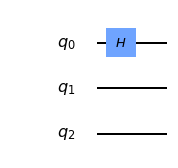

In [2]:
hadamard = [] #inicializa vetor de circuitos

qc= QuantumCircuit(3)
qc.h(0)
hadamard.append(qc)#coloca circuito no vetor
qc.draw()

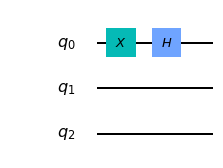

In [3]:
qc= QuantumCircuit(3)
qc.x(0) #nega o qubit zero mudando ele de zero para um
qc.h(0)
hadamard.append(qc)
qc.draw()


In [4]:

backend = Aer.get_backend('statevector_simulator')
job = execute(hadamard, backend)
result = job.result()
outputstate = result.get_statevector(hadamard[0], decimals=3)
print("H|0>")
print(outputstate)
print("------------------------")
outputstate = result.get_statevector(hadamard[1], decimals=3)
print("H|1>")
print(outputstate)

H|0>
[0.707+0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]
------------------------
H|1>
[ 0.707-0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
  0.   +0.j  0.   +0.j]


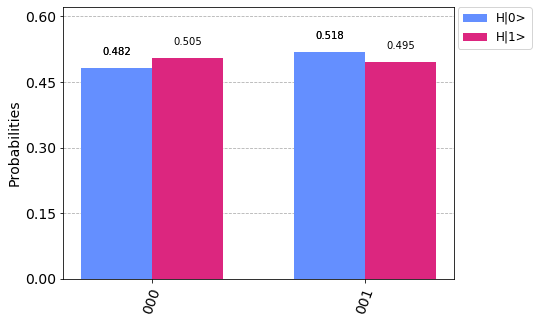

In [5]:
from qiskit.visualization import plot_histogram


# Adiciona medidas nos tres qubits para os dois circuitos
meas = QuantumCircuit(3, 3)
meas.measure(range(3),range(3))
hadamard[0]=hadamard[0]+meas
hadamard[1]=hadamard[1]+meas

# Usa o back end de simulador em qasm
backend_sim = Aer.get_backend('qasm_simulator')
#executa a simulacao 1024 vezes
job_sim = execute(hadamard, backend_sim, shots=1024)

# pega o resultado do trabalho
result_sim = job_sim.result()

counts0 = result_sim.get_counts(hadamard[0])

counts1 = result_sim.get_counts(hadamard[1])

plot_histogram([counts0, counts1], legend = ["H|0>", "H|1>"])

## Mudança de fase
A porta de mundança de uma fase $\theta$ para 1 qubit é dada pela matriz:
    $$
     \begin{pmatrix}
    1 & 0\\
    0 & e^{\theta i} 
    \end{pmatrix}$$
Ou seja ela mantém o componente do vetor-qubit $|0\rangle$ e coloca uma diferença de fase complexa no componente $|1\rangle$. Embora preserve os módulos e logo as probabilidades das medidas. Isso parece não fazer diferença já que a medida é a mesma mas aplicando outras portas como veremos no quarto experimento vemos os efeitos da fase nas nossas computações. No computador da IBM elas estão disponíveis com $\theta$ múltiplos de $\pi/4$. Abaixo temos as portas, suas fases e as letras para inserí-las no circuito de qiskit.
 $$
     T=\begin{pmatrix}
    1 & 0\\
    0 & e^{i\pi/4 } 
    \end{pmatrix}
, t$$

<center> $ S=T^2 $,     $ \theta = \pi/2 $, s

<center>$ Z=T^4 $,     $  \theta = \pi$, z

<center>$ S\dagger=T^6 $, $  \theta = -\pi/2$, sdg

<center>$ T\dagger=T^7 $, $  \theta = -\pi/4$, tdg  

$$ Y=XZ=\begin{pmatrix}
    0 & -i\\
    i & 0 
    \end{pmatrix}, y$$

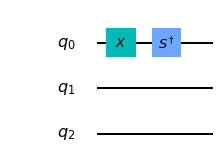

In [14]:
qc= QuantumCircuit(3)
qc.x(0) #nega o qubit zero mudando ele de zero para um(comente para iniciar o qubit com \0>)

#mude a letra apos o ponto a seguir para usar as outras portas
qc.sdg(0)

qc.draw()

No simulador de vetor de estados podemos ver claramente a fase se colocarmos a porta em um qubit no estado $|1\rangle$

In [15]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

[0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


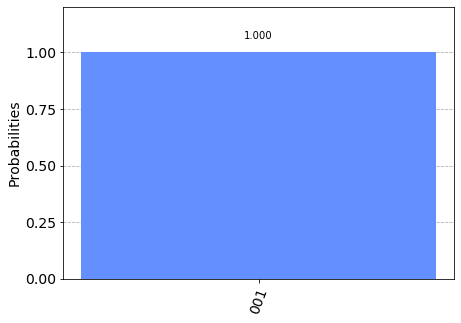

In [16]:
# Adiciona medidas nos tres qubits
meas = QuantumCircuit(3, 3)
meas.measure(range(3),range(3))
qc=qc+meas

# Usa o back end de simulador em qasm
backend_sim = Aer.get_backend('qasm_simulator')
#executa a simulacao 1024 vezes
job_sim = execute(qc, backend_sim, shots=1024)

# pega o resultado do trabalho
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)


plot_histogram(counts)

Usando duas portas de Hadamard e uma porta $Z$ no meio delas podemos ver um exemplo da diferença de fase em um qubit agindo no circuito. Duas portas Hadamard uma seguida da outra não mudam o estado do qubit já que ela é inversa dela mesma. Mas com a mudança de fase mudamos $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ para $ \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$ que é igual a $H|1\rangle$. Logo quando aplicamos o Hadamard novamente que inverte a operação obtemos $HH|1\rangle=|1\rangle$ 

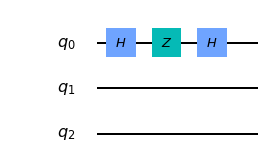

In [17]:
qc= QuantumCircuit(3)
qc.h(0)
qc.z(0) #comente aqui para visualizar o efeito de dois hadamards seguidos
qc.h(0)
qc.draw()

In [18]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

[0.+0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


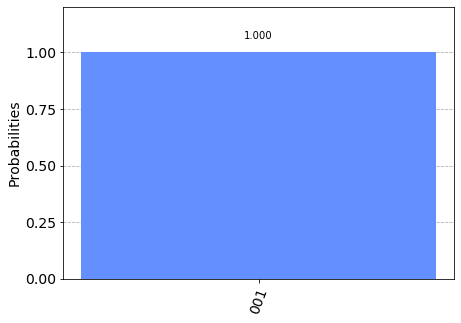

In [19]:
# Adiciona medidas nos tres qubits
meas = QuantumCircuit(3, 3)
meas.measure(range(3),range(3))
qc=qc+meas

# Usa o back end de simulador em qasm
backend_sim = Aer.get_backend('qasm_simulator')
#executa a simulacao 1024 vezes
job_sim = execute(qc, backend_sim, shots=1024)

# pega o resultado do trabalho
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)


plot_histogram(counts)

## Portões CNOT

Portões CNOT são portas quânticas NOT (ou NÃO) controladas e funcionam da seguinte maneira: Há um qubit controlador e um qubit que sofre a operação NOT. Se e somente se o qubit controlador é $|1\rangle$ que o outro qubit é invertido de $|1\rangle$ para $|0\rangle$ ou de $|0\rangle$ para $|1\rangle$. Se o controlador for $|0\rangle$ o controlado mantém o seu estado o qubit controlador não é alterado.

Com a porta CNOT podemos emaranhar dois ou mais qubits fazendo com que haja uma correlação nas medidas deles. O estado de Bell. No caso sempre que medirmos $|1\rangle$ no qubit 2 sempre mediremos $|1\rangle$ no qubit 3 e o mesmo para zero. Obtemos isso com uma porta de Hadamard e um CNOT controlado pelo mesmo qubit que tem o Hadamard.




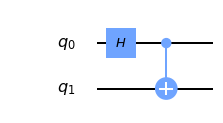

In [2]:
qcnot= QuantumCircuit(2)
qcnot.h(0)
qcnot.cx(0,1)

qcnot.draw()

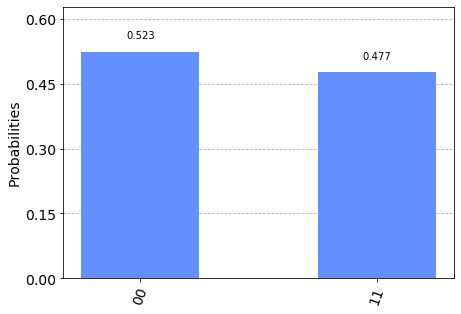

In [3]:

# Adiciona medidas nos dois qubits
meas = QuantumCircuit(2, 2)
meas.measure(range(2),range(2))
qcnot=qcnot+meas

backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qcnot, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qcnot)

plot_histogram(counts)

## Porta de Toffoli

A porta de Toffoli é uma porta CNOT controlada por dois qubits. Aqui colocamos os dois qubits de controle em estado de Bell e como os dois juntos controlam o terceiro qubit os três ficam numa superposição chamada estado de GHZ.

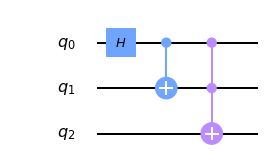

In [6]:
qcnot= QuantumCircuit(3)
qcnot.h(0)
qcnot.cx(0,1)
qcnot.ccx(0,1,2)

qcnot.draw()

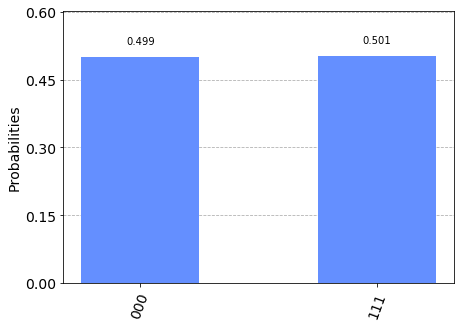

In [7]:

# Adiciona medidas nos tres qubits
meas = QuantumCircuit(3, 3)
meas.measure(range(3),range(3))
qcnot=qcnot+meas

backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qcnot, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qcnot)

plot_histogram(counts)

Aqui colocamos os dois qubits de controle em estado de superposição com portas de Hadamard. Vemos no resultado da simulação que os resultados de medida possíveis são $|000\rangle$ estados com apenas um dos qubits de controle com um $|010$ e $|001$. E finalmente $|111\rangle$ com os dois qubits de controle iguais a 1 e logo o alvo também.

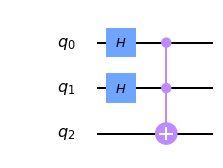

In [61]:
qcnot= QuantumCircuit(3)
qcnot.h(0)
qcnot.h(1)
qcnot.ccx(0,1,2)

qcnot.draw()

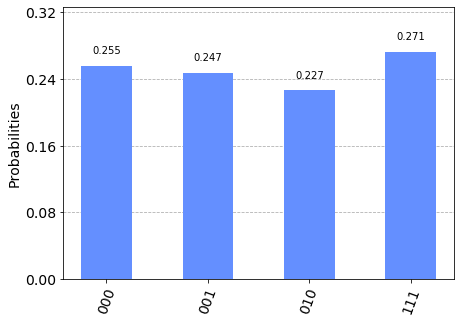

In [62]:

# Adiciona medidas nos tres qubits
meas = QuantumCircuit(3, 3)
meas.measure(range(3),range(3))
qcnot=qcnot+meas

backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qcnot, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qcnot)

plot_histogram(counts)


## A porta Swap e a porta de Fredkin

A porta SWAP troca dois qubits de lugar a de Fredkin é uma porta de SWAP controlada(CSWAP). 

A Porta de SWAP e construída usando três portas CNOT alternadas.

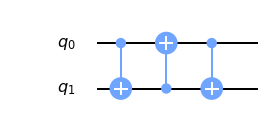

In [25]:
qcswap= QuantumCircuit(2)
qcswap.cx(0,1)
qcswap.cx(1,0)
qcswap.cx(0,1)
qcswap.draw()

A porta de Fredikin usa uma porta de Toffolli no lugar da CNOT do meio. Note que duas portas CNOT consecutivas revertem uma a outra e que uma porta de Toffolli com a sua entrada que não será trocada em 0 é o mesmo que se não houvesse nenhuma porta.

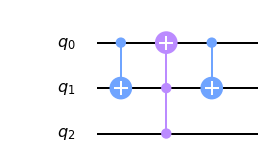

In [26]:
qcswap= QuantumCircuit(3)
qcswap.cx(0,1)
qcswap.ccx(2,1,0)
qcswap.cx(0,1)
qcswap.draw()


# Algoritmo de busca de Groover
Nesse projeto veremos um exemplo de computação quântica com o algoritimo de busca de Groover. Esse algoritmo é notável porque a base de dados precisa ser consultada para encontrar o valor em média $\frac{\pi}{4}\sqrt{n}$ vezes ao invés de $\frac{n}{2}$ que seria uma busca com um computador clássico. Isso significaria uma redução no tempo de busca bem significativa para bases de dados grandes.

No entanto a lista precisaria ser armazenada na forma de um oraculo quântico. Um oraculo quântico aceitaria superposições de consultas à lista retornando uma superposição de respostas. Todavia para obter essa resposta com uma medida acabariamos colapsando a função de onda fazendo com que não pudessemos analisar a superposição para obter a resposta. Mas Groover obteve uma maneira de operar essa função de onda para que ela colapse para a resposta correta a maioria das vezes. Que é o operador de difusão de Groover.

O oráculo quântico é dado por uma matriz identidade para operar o número desejado de qubits com o 1 equivalente à resposta com o sinal invertido. Exemplo para dois qubits e com a resposta como estado $|10\rangle$:
$$
   O=\begin{pmatrix}
    1 & 0 & 0 & 0\\
    0 & 1 & 0 & 0\\
    0 & 0 & -1 & 0\\
    0 & 0 & 0 & 1
    \end{pmatrix}$$

O oráculo é um operador quântico pois é uma matriz unitária (cuja conjugada hermitiana é a inversa dela mesma) e ele inverte o sinal apenas do componente equivalente a resposta. Logo se a resposta procurada for $|10\rangle$ o oráculo dela é $O|10\rangle=-|10\rangle$. Enquanto o oraculo de outro estado conserva a amplitude dele. E de uma função $\Psi$ com quatro estados possíveis é $O|\Psi\rangle = O(a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle)=a|00\rangle+b|01\rangle-c|10\rangle+d|11\rangle$

O resto do circuito é o operador de difusão de Groover. Ele que faz com que a alteração do oráculo no estado do registrador quântico seja mensurável através da amplificação de amplitude. No caso o circuito amplifica somente as amplitudes de probabilidade negativas atenuando as positivas. Ele consiste de portões de Hadamard em todos os qubits seguidos de um operador $J$ que inverte o sinal do estado de $|00\rangle$ da mesma maneira que o oráculo mas sempre nesse estado seguido de mais portôes de Hadamard em todos os qubits. O oráculo mais o operador de difusão devem ser repetidos $(\pi/4)\sqrt{2^N}$ vezes arrendodado para um inteiro onde N é o número de qubits. Para três qubits que usaremos isso resulta em $2.22$ arredondado para 2 blocos.


Abaixo temos o código que executa essa operação. Nota-se que obtemos muito mais que 90% de chance de obter o como resultado a nossa resposta no caso o número 5, $|101\rangle$ em binário. Começamos colocando todos os qubits em superposição com portas de Hadamard.

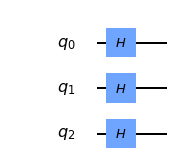

In [2]:

hadamards=QuantumCircuit(3)
#Inicializa todos os qubits em superposicao
hadamards.h(0)
hadamards.h(1)
hadamards.h(2)
hadamards.draw()

O oráculo quântico é construído usando uma porta $Z$ controlada por dois qubits. Essa porta funciona como um oráculo para a resposta '111' porque ela muda a fase em $-1$ do componente $|1\rangle$ do qubit alvo apenas se os qubits de controle forem 1. Logo ela muda a fase apenas do componente $|111\rangle$ da base do espaço de três qubits. Se quisermos usar outro valor como resposta basta colocar uma porta $X$ antes e depois dos qubits que são nulos. A porta $X$ troca de lugar os componentes $|1\rangle$ e $|0\rangle$ do qubit. Aí operamos a porta $Z$ controlada e trocamos de novo com outra porta $X$ fazendo com que somente o componente $|101\rangle$ que fique com a fase invertida por exemplo.

Essa porta é feita no computador da IBM com uma porta de Toffoli e duas portas de Hadamard no bit alvo. Uma antes e uma depois. A porta é equivalente porque a operação $HXH$ é a mesma que uma porta $Z$ assim como $HZH$ equivale a uma $X$. 

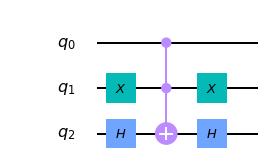

In [3]:

resposta=5

#oraculo quantico ###########################################
oracle=QuantumCircuit(3)
#coloca portas X antes dos bits 0 da resposta
if(resposta % 2 == 0):
    oracle.x(0)
if((resposta % 4) //2 == 0):
    oracle.x(1)
if( (resposta % 8) //4 == 0):
    oracle.x(2)

#porta Z em 2 controlada por 0 e 1
oracle.h(2)
oracle.ccx(0,1,2)
oracle.h(2)

#coloca portas X depois dos bits 0 da resposta
if(resposta % 2 == 0):
    oracle.x(0)
if((resposta % 4) //2 == 0):
    oracle.x(1)
if( (resposta % 8) //4 == 0):
    oracle.x(2)
oracle.draw()

O operador de difusão de Groover é composto por portas de Hadamard em todos os qubits e pelo operador $J$ que é como o oráculo mas sempre no valor de $|000\rangle$ e novamente portas de Hadamard em todos os qubits.

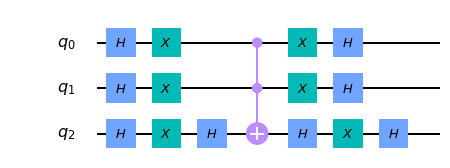

In [4]:
difusao=QuantumCircuit(3)
#hadamards
difusao=difusao+hadamards

#portas x para o estado |000> 
difusao.x(0)
difusao.x(1)
difusao.x(2)

#porta Z controlada 
difusao.h(2)
difusao.ccx(0,1,2)
difusao.h(2)

difusao.x(0)
difusao.x(1)
difusao.x(2)

#hadamards
difusao=difusao+hadamards

difusao.draw()

O bloco de difusão junto com o oráculo é repetido $(\pi/4)\sqrt{2^2}\approx2,22\approx2$ vezes.

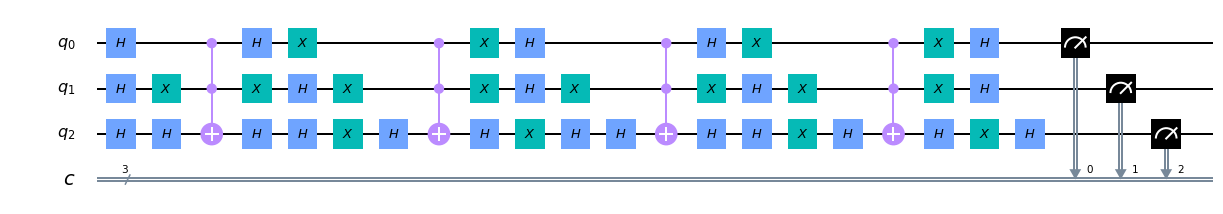

In [5]:
mdir=QuantumCircuit(3,3)
grvc=QuantumCircuit(3)
mdir.measure(range(3),range(3)) #circuito para a medicao dos qubits

#oraculo e o operador de difusoa sao repetidos 2 vezes
grvc=hadamards+oracle+difusao+oracle+difusao+mdir

grvc.draw()

Resultado de uma simulação do circuito:

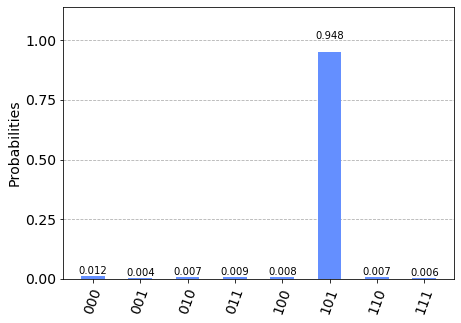

In [18]:
#simulacao de um computador quantico
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(grvc, backend_sim, shots=1024)
result_sim = job_sim.result()
plot_histogram(result_sim.get_counts(grvc))

Resultado de um execução do circuito em um computador quântico real da IBM:

In [7]:
#executa o circuito em um computador quantico real
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmqx2')

job = execute(grvc, backend=backend, shots=4096)
job_monitor(job)

Job Status: job has successfully run


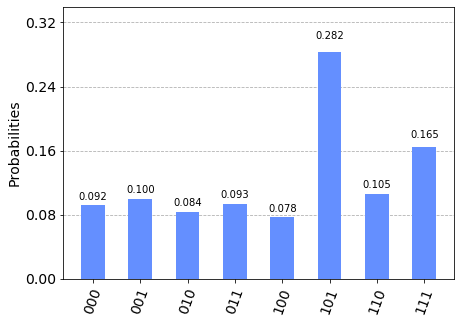

In [8]:
resultado_comp = job.result()
plot_histogram(resultado_comp.get_counts(grvc))

# O algoritmo de Shor
Dado um número $C$ que se deseja encontrar os fatores:

1. Cheque se $C$ é impar e não é potência de algum inteiro pequeno. Se for um desses encontramos um fator de $C$ e terminamos.

2. Pegue qualquer inteiro no intervalo $1<a<C$.

3. Encontre o $mdc(a, C)$ (maior divisor comum). Se o mdc for maior que 1 por sorte, encotramos ja um fator de C e terminamos.

4. Encontre o menor inteiro $p$ tal que $a^{p} \equiv 1\, mod\, C$. A expressão  $p \equiv q \, mod\, C$ quer dizer a congruência modular. Ou seja $p-q$ é um inteiro multiplo de C. Isso pode ser escrito também como $p\, mod\, C = q\, mod\, C$.

5. Se $p$ é impar ou se $p$ é par e $a^{p/2} \equiv -1\, mod\, C$ volte para 2 e escolha um novo $a$.

6. Os números $P_{\pm} = mdc( a^{p/2} \pm 1, C)$ são fatores não triviais de C.

O computador quântico é responsável pelo 4º passo desse algoritmo. O resto dos passos como encontrar o mdc são feitos rapidamente em um computador clássico.

## 4° passo: encontrar o período

Esse passo se chama encontrar o período pois $f(x)=a^{x} \, mod \, C$ é uma função periódica com período $p$. Dividimos o registrador quântico em duas partes: o registrador $x$ com $L$ qubits iniciado em $|0...0\rangle$ e o $f$ com $M$ qubits iniciado em $|0...01\rangle$:

1. Aplique portas de Hadamard em todos os L qubits do registrador $x$, representado por $H^{\otimes L}$. Isso coloca o registrador $x$ numa superposição de todos os $2^{L}$ estados possíveis

2. Multiplique o registrador $f$ por $a^{x} \, mod \, C$ fazendo com que fique com o valor de $f(x)$.

3. Faça uma transformada de fourier quântica inversa (IQFT em inglês) no registrador $x$. A IQFT permite encontrar o período da função.

4. Meça a saída $\bar{x}$ de do IQFT. Shor provou que $\bar{x}/2^{L}$ é igual a aproximadamente $s/p$ onde $s$ é um inteiro qualquer. Usamos isso para encontrar $p$. Por exemplo $\bar{x}/2^{L} = 0.32 \cong 1/3 = 2/6 = 3/9$ então $p$ é $3, 6, 9, \cdots$ Checamos em seguida esses valores para ver se $a^{p} \equiv 1\, mod\, C$. 


## Algoritmo de Shor com $C=15$ e $a=4$:

Começamos colocando as entradas do registrador x (qubits 3 e 4) em superposição:

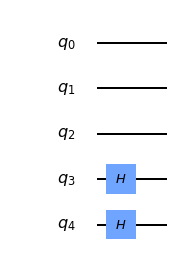

In [3]:

hadamards=QuantumCircuit(5)
#Inicializa os qubits do registradores de L em superposicao
hadamards.h(3)
hadamards.h(4)
hadamards.draw()

Agora fazemos o multiplicador por $a^x\, mod\, 15=4^x\, mod\, 15$. Dividimos ele em duas partes: $4^1\, mod\, 15$ controlado pelo qubit de $x$ menos significativo e $4^2\, mod\, 15$ controlado pelo mais significativo. Assim se o qubit de $x$ menos significativo for 1 multiplicamos $f$ por $4\,mod\,15$ e o mesmo para o mais. Obtendo assim $4^{x_0+x_1}\, mod\, 15$. Como $4^2\,mod\,15=16\,mod\,15=1$ precisamos fazer apenas o do bit menos significativo. Para multiplicar o número 1 por 4 sempre que o qubit menos significativo de $x$ for 1 basta usar uma porta CNOT que zera a porta com 1 do digito menos significativo com peso 1 e uma que seta o qubit com peso 4.

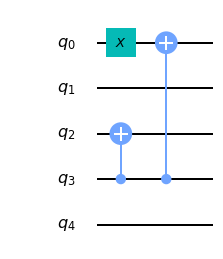

In [20]:
mult=QuantumCircuit(5)
mult.x(0)#inicializa o registrador f em 1

mult.cx(3,2)#seta q2(f2) se q3(x0) for um
mult.cx(3,0)#zera q0(f0) se q3(x0) for um
mult.draw()

Aqui fazemos a transformada Quântica de Fourier reversa (IQFT em inglês) nos qubits do registrador $x$ 

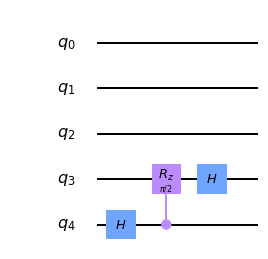

In [21]:
from math import pi
iqft=QuantumCircuit(5)
iqft.h(4)
iqft.crz(pi/2, 4, 3)
iqft.h(3)
iqft.draw()

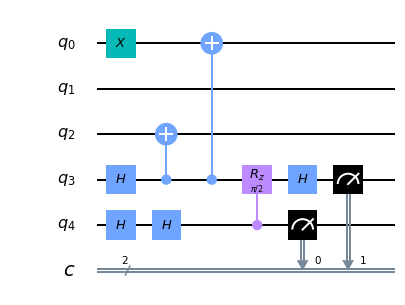

In [22]:
mdir=QuantumCircuit(5,2)
shor=QuantumCircuit(5)
mdir.measure([3, 4],[1,0]) #circuito para a medicao dos qubits

#oraculo e o operador de difusoa sao repetidos 2 vezes
shor=hadamards+mult+iqft+mdir

shor.draw()

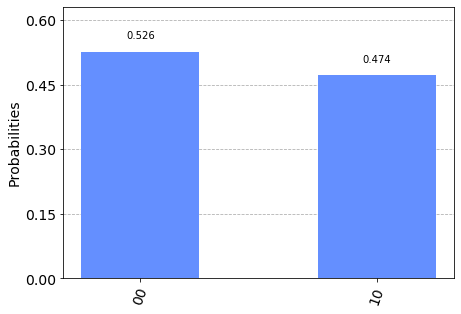

In [23]:
#simulacao de um computador quantico
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(shor, backend_sim, shots=1024)
result_sim = job_sim.result()
plot_histogram(result_sim.get_counts(shor))

In [18]:
#executa o circuito em um computador quantico real
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmq_16_melbourne')

job_shor = execute(shor, backend=backend, shots=4096)
job_monitor(job_shor)

Job Status: job has successfully run


Resultado da execução do algoritmo no computador quântico da IBM:

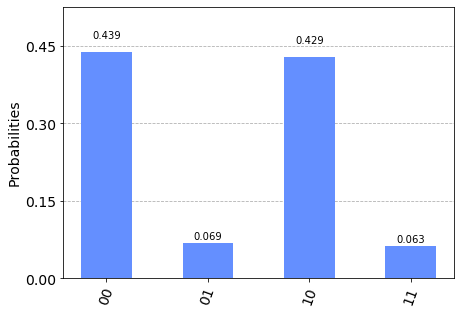

In [19]:
resultado_shor = job_shor.result()
plot_histogram(resultado_shor.get_counts(shor))

Obtemos como resultados principais no computador quântico 00 e 10=2 o que dá $0/2^L=0$ e $2/2^L=2/4=1/2$. Podemos concluir a partir dessa fração que o período da função $4^x \, mod\,15$ é p=2

In [36]:
#passo 5
#ele tem que dar diferente de 0
from fractions import gcd
C=15
p=2
a=4
print (((a**(p/2)+1) % C), "é diferente de 0? Se sim:")

#passo 6
print ("p+ =")
print (gcd(a**(p/2)+1,C))
print ("p- =")
print (gcd(a**(p/2)-1,C))

5.0 é diferente de 0? Se sim:
p+ =
5.0
p- =
3.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  del sys.path[0]


## Algoritmo de Shor com $C=15$ e $a=2$:

O algoritmo de Shor para valores diferentes de $a=4$ exige mais qubits no registrador $f$ porque com 3 qubits é possível ir com os os valores de $f(x)$ somente até 7. Como os períodos possíveis para os $a$s de C=15 são ou 2 ou 4 precisamos somente de 2 qubits. Mas já que já extrapolei o limite para utilizar o computador quântico da IBM vou usar mais para ilustrar melhor o algoritmo. Começamos com os Hadamards para preparar uma superposição novamente.


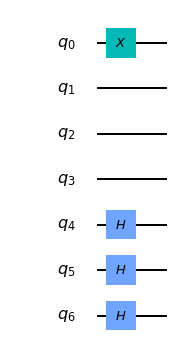

In [47]:

hadamards=QuantumCircuit(7)
#Inicializa os qubits do registradores de L em superposicao
hadamards.h(4)
hadamards.h(5)
hadamards.h(6)
hadamards.x(0)#inicializa o registrador f em 1
hadamards.draw()

Agora fazemos o multiplicador por $a^x\, mod\, 15=2^x\, mod\, 15$. Dividimos ele em 3 partes: $2^1\, mod\, 15$ controlado pelo qubit de $x$ menos significativo, $2^2\, mod\, 15$ controlado pelo qubit do meio e $2^4\, mod\, 15$ controlado pelo mais significativo. Assim se o qubit de $x$ menos significativo for 1 multiplicamos $f$ por $2\,mod\,15$ e o mesmo para os outros. Obtendo assim $4^{x_0+x_1+x_2}\, mod\, 15$. Como $2^4\,mod\,15=16\,mod\,15=1$ precisamos fazer apenas o do meio e o do qubit menos significativo. Para multiplicar um número por 2 módulo 15 vamos usar três portas de Fredkin:

In [65]:
print("x,   p0=1")
for i in range(0,16):
    print(bin(i)[2:].zfill(4), bin((i*2)%15 )[2:].zfill(4))

x,   p0=1
0000 0000
0001 0010
0010 0100
0011 0110
0100 1000
0101 1010
0110 1100
0111 1110
1000 0001
1001 0011
1010 0101
1011 0111
1100 1001
1101 1011
1110 1101
1111 0000


Para números binários, a multiplicação por dois é um deslocamento para a esquerda. Como fazemos o módulo 15 do valor também note que os números dão a volta pela esquerda de volta a direta, como uma rotação. Para fazer esse deslocamento usamos portas de Fredkin para fazer SWAPs controlados nos qubits de $f$

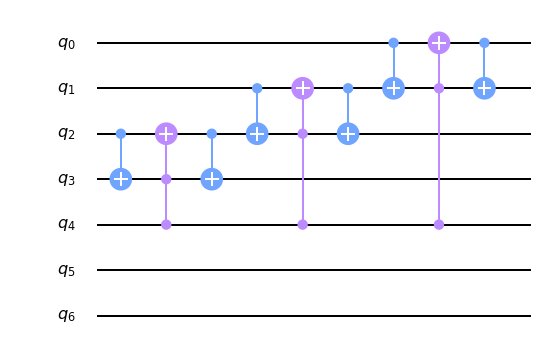

In [48]:
mult21=QuantumCircuit(7)

#fredkin controlado por q4(x0) em q2(f2) e q3(f3)
mult21.cx(2,3)
mult21.ccx(4,3,2)
mult21.cx(2,3)

mult21.cx (1,2)
mult21.ccx (4,2,1)
mult21.cx (1,2)

mult21.cx (0,1)
mult21.ccx (4,1,0)
mult21.cx (0,1)

mult21.draw()

Para multiplicar por $2^2=4$ o circuito vai funcionar de maneira semelhante. Só que com um deslocamente de dois qubits.

In [66]:
print("x,   p0=1")
for i in range(0,16):
    print(bin(i)[2:].zfill(4), bin((i*4)%15 )[2:].zfill(4))

x,   p0=1
0000 0000
0001 0100
0010 1000
0011 1100
0100 0001
0101 0101
0110 1001
0111 1101
1000 0010
1001 0110
1010 1010
1011 1110
1100 0011
1101 0111
1110 1011
1111 0000


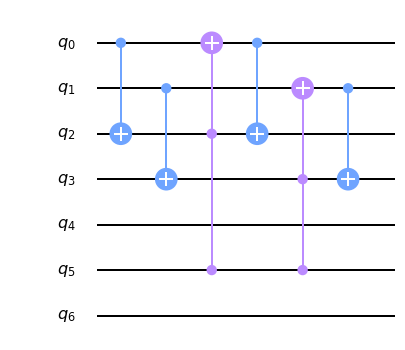

In [49]:
mult22=QuantumCircuit(7)

#fredkin controlado por q5(x1) em q0(f0) e q2(f2)
mult22.cx (0,2)
mult22.ccx (5,2,0)
mult22.cx (0,2)

mult22.cx (1,3)
mult22.ccx (5,3,1)
mult22.cx (1,3)

mult22.draw()

Aqui fazemos a transformada Quântica de Fourier reversa (IQFT em inglês) nos qubits do registrador $x$ 

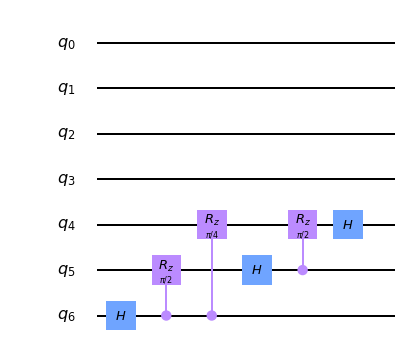

In [51]:
from math import pi
iqft=QuantumCircuit(7)
iqft.h(6)
iqft.crz(pi/2, 6, 5)
iqft.crz(pi/4, 6, 4)

iqft.h(5)
iqft.crz(pi/2,5, 4)

iqft.h(4)
iqft.draw()


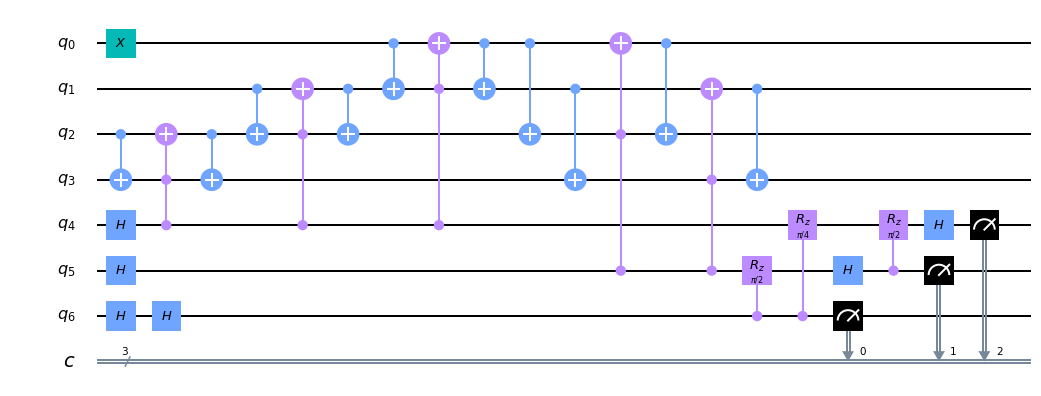

In [52]:
mdir=QuantumCircuit(7,3)
shor=QuantumCircuit(5)
mdir.measure([4, 5, 6],[2,1,0]) #circuito para a medicao dos qubits(bits de medida ja trocados)

#oraculo e o operador de difusoa sao repetidos 2 vezes
shor=hadamards+mult21+mult22+iqft+mdir

shor.draw()

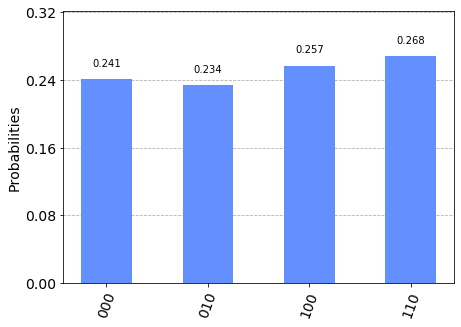

In [53]:
#simulacao de um computador quantico
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(shor, backend_sim, shots=1024)
result_sim = job_sim.result()
plot_histogram(result_sim.get_counts(shor))

In [54]:
#executa o circuito em um computador quantico real
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmq_16_melbourne')

job_shor = execute(shor, backend=backend, shots=4096)
job_monitor(job_shor)

Job Status: job has successfully run


Resultado da execução do algoritmo no computador quântico da IBM:

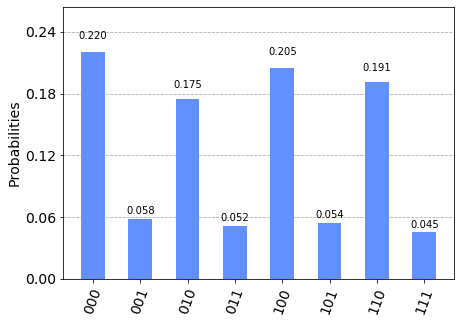

In [55]:
resultado_shor = job_shor.result()
plot_histogram(resultado_shor.get_counts(shor))

Aqui obtemos como resultados principais no computador quântico 000,010=2,100=4 e 110=6 o que dá $0/2^L=0$, $2/2^L=2/8=1/4$, $4/8=2/4$ e $6/8=3/4$. Podemos concluir a partir dessas frações que o período da função $2^x \, mod\,15$ é p=4

In [56]:
#passo 5
#ele tem que dar diferente de 0
from fractions import gcd
C=15
p=4
a=2
print (((a**(p/2)+1) % C), "é diferente de 0? Se sim:")

#passo 6
print ("p+ =")
print (gcd(a**(p/2)+1,C))
print ("p- =")
print (gcd(a**(p/2)-1,C))

5.0 é diferente de 0? Se sim:
p+ =
5.0
p- =
3.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.
  del sys.path[0]
